<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

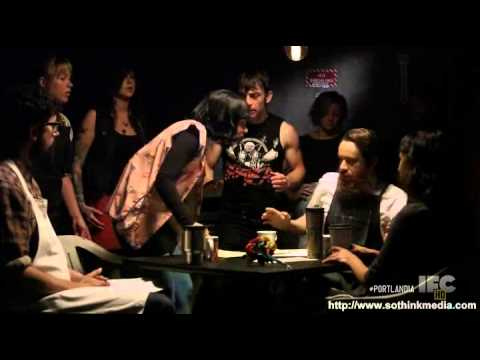

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\keith\\Desktop\\GH\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [4]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
shops.full_review_text = shops.full_review_text.\
    apply(lambda x: re.sub('[0-9]', '', x))

shops.full_review_text = shops.full_review_text.\
    apply(lambda x: re.sub('/', '', x).strip())

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0 star rating
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0 star rating
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0 star rating


In [7]:
shops.star_rating = shops.star_rating.\
    apply(lambda x: re.sub('[^0-9.]', '', x))

In [8]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0


In [9]:
shops.star_rating = shops.star_rating.astype('float') 

shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
dtype: object

In [10]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [11]:
shops['base_tokens'] = shops['full_review_text'].apply(tokenize)
shops['base_tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: base_tokens, dtype: object

In [12]:
shops[['base_tokens', 'full_review_text']][:10]

,base_tokens,full_review_text
0,"[checkin, love, love, loved, the, atmosphere, ...",check-in Love love loved the atmosphere! Every...
1,"[listed, in, date, night, austin, ambiance, in...","Listed in Date Night: Austin, Ambiance in Aust..."
2,"[checkin, listed, in, brunch, spots, i, loved,...",check-in Listed in Brunch Spots I loved the ec...
3,"[very, cool, decor, good, drinks, nice, seatin...",Very cool decor! Good drinks Nice seating How...
4,"[checkin, they, are, located, within, the, nor...",check-in They are located within the Northcros...
5,"[checkin, very, cute, cafe, i, think, from, th...",check-in Very cute cafe! I think from the mome...
6,"[checkins, listed, in, nuptial, coffee, bliss,...","check-ins Listed in ""Nuptial Coffee Bliss!"", A..."
7,"[checkins, love, this, place, stars, for, clea...",check-ins Love this place! stars for cleanli...
8,"[checkin, ok, lets, try, this, approach, pros,...","check-in Ok, let's try this approach... Pros:..."
9,"[checkins, this, place, has, been, shown, on, ...",check-ins This place has been shown on my soci...


In [18]:
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [20]:
from tqdm import tqdm
tqdm.pandas()

C:\Users\keith\.conda\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [21]:
# Wrap it all in a function
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [22]:
shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)
shops['lemmas'].head()

100%|██████████████████████████████████████████████████████████████████████████████| 7616/7616 [01:53<00:00, 67.10it/s]


0    [check, Love, love, love, atmosphere, corner, ...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [check, list, Brunch, Spots, love, eclectic, h...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [check, locate, Northcross, mall, shopping, ce...
Name: lemmas, dtype: object

In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,base_tokens,lemmas
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0,"[checkin, love, love, loved, the, atmosphere, ...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, in, date, night, austin, ambiance, in...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0,"[checkin, listed, in, brunch, spots, i, loved,...","[check, list, Brunch, Spots, love, eclectic, h..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0,"[checkin, they, are, located, within, the, nor...","[check, locate, Northcross, mall, shopping, ce..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
#word count

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['base_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [25]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [29]:
# Use the Function
wc = count(shops['lemmas'])
print(wc.shape)
wc.head()

(16769, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,,4786,17383,1.0,0.046826,0.046826,0.628414
28,coffee,4820,10050,2.0,0.027073,0.073899,0.632878
104,place,3875,6029,3.0,0.016241,0.090139,0.508797
151,good,3572,5338,4.0,0.014379,0.104519,0.469013
109,great,2844,3917,5.0,0.010552,0.115070,0.373424


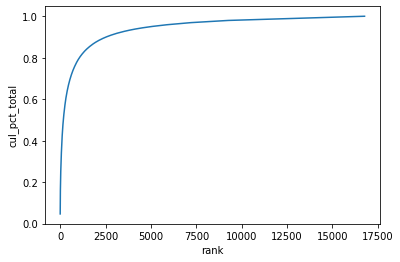

In [30]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [31]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.40647046939187803

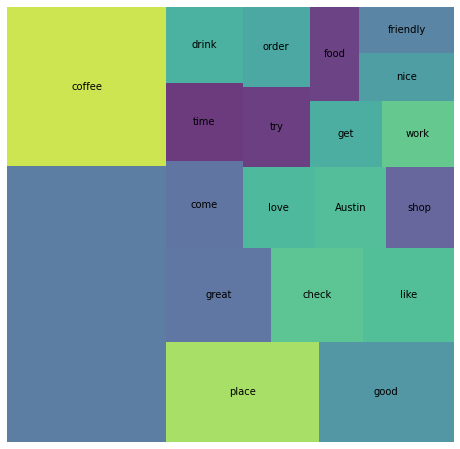

In [32]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [28]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,base_tokens,lemmas
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0,"[checkin, love, love, loved, the, atmosphere, ...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, in, date, night, austin, ambiance, in...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0,"[checkin, listed, in, brunch, spots, i, loved,...","[check, list, Brunch, Spots, love, eclectic, h..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0,"[checkin, they, are, located, within, the, nor...","[check, locate, Northcross, mall, shopping, ce..."


In [43]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',' '])
STOP_WORDS

{' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'Amazon',
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazon',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'batteries',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',

In [36]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [44]:
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['spaCy_tokens_v3'] = tokens

In [45]:
wc = count(shops['spaCy_tokens_v3'])
print(wc.shape)
wc.head()

(37737, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,coffee,4213,8063,1.0,0.020893,0.020893,0.553178
109,place,3029,4264,2.0,0.011049,0.031943,0.397715
112,great,2438,3250,3.0,0.008422,0.040364,0.320116
184,like,2034,2902,4.0,0.007520,0.047884,0.267069
169,good,2084,2779,5.0,0.007201,0.055085,0.273634


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [46]:
# Divide dataset now by < 3 or > 3 star_rating
high = shops[shops['star_rating'] > 4.0]
low = shops[shops['star_rating'] < 2.0]

In [52]:
high_wc = count(high['spaCy_tokens_v3'])
high_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,coffee,2026,3881,1.0,0.022690,0.022690,0.535979
120,place,1384,1906,2.0,0.011143,0.033833,0.366138
363,great,1391,1865,3.0,0.010903,0.044736,0.367989
17,love,892,1145,4.0,0.006694,0.051430,0.235979
116,good,878,1124,5.0,0.006571,0.058002,0.232275
67,like,797,1102,6.0,0.006443,0.064444,0.210847
146,best,713,817,7.0,0.004776,0.069221,0.188624
2,check-in,803,804,8.0,0.004700,0.073921,0.212434
93,i'm,613,775,9.0,0.004531,0.078452,0.162169
154,-,411,740,10.0,0.004326,0.082778,0.108730


In [53]:
low_wc = count(low['spaCy_tokens_v3'])
low_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
57,coffee,121,219,1.0,0.013570,0.013570,0.435252
144,like,100,163,2.0,0.010100,0.023669,0.359712
26,place,105,162,3.0,0.010038,0.033707,0.377698
45,service,68,86,4.0,0.005329,0.039036,0.244604
59,don't,68,80,5.0,0.004957,0.043993,0.244604
20,good,63,75,6.0,0.004647,0.048640,0.226619
77,food,50,75,7.0,0.004647,0.053287,0.179856
353,time,49,70,8.0,0.004337,0.057624,0.176259
108,order,45,69,9.0,0.004275,0.061900,0.161871
382,asked,53,68,10.0,0.004213,0.066113,0.190647


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

